In [2]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords

In [3]:
print(np.__version__)
print(tf.__version__)

1.26.0
2.18.0


# Set up stopwords

In [72]:
STOPWORDS = set(stopwords.words('english'))

In [73]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [74]:
#create empty lists for articles and their corresponding labels
articles = []
labels = []

#Read the BBC headline corpus

In [84]:
# importing csv module
import csv

# csv file name
filename = "bbc-txt.csv"

# initializing the titles and rows list
fields = []
rows = []

# reading csv file
with open(filename, 'r') as csvfile:
	# creating a csv reader object
	csvreader = csv.reader(csvfile)

	# extracting field names through first row
	fields = next(csvreader)

	# extracting each data row one by one
	for row in csvreader:
		rows.append(row)

	# get total number of rows
	print("Total no. of rows: %d"%(csvreader.line_num))

# printing the field names
print('Field names are:' + ', '.join(field for field in fields))

# printing first 5 rows
print('\nFirst 5 rows are:\n')
for row in rows[:5]:
	# parsing each column of a row
	for col in row:
		print("%10s"%col,end=" "),
	print('\n')

Total no. of rows: 20380
Field names are:Shark Tale DVD is US best-seller

First 5 rows are:



Oscar-nominated animation Shark Tale has raked in $80m (£42.4m) in the first week of its US DVD release becoming the year's best-selling home video so far. 



The tally for its DVD and video sales soared past the film's opening week US box office takings of $56m (£29.7m). Shark Tale is now the sixth-highest earning DVD for first week sales. The all-time first-week record is held by 1995's Lion King followed by Shrek 2  Finding Nemo  the original Shrek  and Monster's Inc. 





In [40]:
!pip install patool==1.12 # Install patool library for unzipping

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.2 MB/s eta 0:00:00


In [86]:
import csv
import os # Import the os module

bbc_dir = "/content/bbc"  # Path to the directory containing subfolders
categories = ["business", "entertainment", "politics", "sport", "tech"]  # Subfolder names

articles = []
labels = []

for category in categories:
    category_path = os.path.join(bbc_dir, category)  # Path to the current category subfolder
    for filename in os.listdir(category_path):
        if filename.endswith(".txt"):  # Check if it's a text file
            filepath = os.path.join(category_path, filename)  # Path to the text file
            with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
                content = file.read()
                articles.append(content)  # Add the article content to the list
                labels.append(category)  # Add the category label to the list

print(f"Total number of articles: {len(articles)}")  # Print the total number of articles
print(f"Total number of labels: {len(labels)}")  # Print the total number of labels

Total number of articles: 2225
Total number of labels: 2225


In [87]:
import os

# Directory containing the subfolders
bbc_dir = "/content/bbc"

# Subfolder names (categories)
categories = ["business", "entertainment", "politics", "sport", "tech"]

articles = []
labels = []

# Iterate through each category subfolder
for category in categories:
    category_path = os.path.join(bbc_dir, category)

    # Iterate through each text file in the subfolder
    for filename in os.listdir(category_path):
        if filename.endswith(".txt"):  # Check if it's a text file
            filepath = os.path.join(category_path, filename)

            # Read the content of the text file
            with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
                content = file.read()
                articles.append(content)
                labels.append(category)

print(f"Total number of articles: {len(articles)}")
print(f"Total number of labels: {len(labels)}")

Total number of articles: 2225
Total number of labels: 2225


In [88]:
!wget -nc http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip -P /content/

File ‘/content/bbc-fulltext.zip’ already there; not retrieving.



In [89]:
import os

bbc_dir = "/content/bbc"
categories = ["business", "entertainment", "politics", "sport", "tech"]

articles = []
labels = []

for category in categories:
    category_path = os.path.join(bbc_dir, category)
    for filename in os.listdir(category_path):
        if filename.endswith(".txt"):
            filepath = os.path.join(category_path, filename)
            with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
                content = file.read()
                articles.append(content)
                labels.append(category)

print(f"Total number of articles: {len(articles)}")
print(f"Total number of labels: {len(labels)}")

Total number of articles: 2225
Total number of labels: 2225


In [90]:
# The following lines were causing the error, and should be removed
# with open('bbc-text.csv', 'r') as csvfile:
#     reader = csv.reader(csvfile, delimiter=',')
#     next(reader)
#     for row in reader:
#         labels.append(row[0])
#         article = row[1]
#         for word in STOPWORDS:
#             token = ' ' + word + ' '
#             article = article.replace(token, ' ')
#             article = article.replace(' ', ' ')
#         articles.append(article)
# print(len(labels))
# print(len(articles))

# Your existing code to load data from folders is correct and should remain:
import os

bbc_dir = "/content/bbc"
categories = ["business", "entertainment", "politics", "sport", "tech"]

articles = []
labels = []

for category in categories:
    category_path = os.path.join(bbc_dir, category)
    for filename in os.listdir(category_path):
        if filename.endswith(".txt"):
            filepath = os.path.join(category_path, filename)
            with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
                content = file.read()
                articles.append(content)
                labels.append(category)

print(f"Total number of articles: {len(articles)}")
print(f"Total number of labels: {len(labels)}")

Total number of articles: 2225
Total number of labels: 2225


In [91]:
sorted(set(labels))

['business', 'entertainment', 'politics', 'sport', 'tech']

In [92]:
train_size = int(len(articles) * training_portion)

train_articles = articles[:train_size]
train_labels = labels[:train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]


print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [93]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
#dict(list(word_index.items())[:20])

In [94]:
#check sequenced texts
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[1779])

[4332, 1181, 8, 1175, 55, 3040, 880, 1, 4332, 18, 479, 2, 126, 7, 685, 1175, 24, 16, 26, 140, 1, 3615, 437, 319, 4, 41, 684, 585, 22, 4332, 5, 124, 8, 1828, 4772, 404, 610, 276, 45, 1166, 48, 926, 3, 111, 2, 88, 734, 374, 69, 2, 1175, 13, 76, 114, 605, 89, 3006, 2, 140, 1, 315, 44, 593, 513, 195, 44, 69, 1757, 4333, 22, 1968, 85, 46, 55, 2, 148, 3, 492, 102, 63, 36, 195, 57, 1175, 571, 477, 1761, 2020, 9, 112, 3, 2119, 26, 672, 8, 2, 892, 1137, 585, 105, 239, 63, 2020, 14, 2301, 54, 39, 15, 14, 1112, 942, 13, 34, 3880, 3294, 10, 26, 166, 124, 242, 22, 4332, 11, 1, 16, 471, 1851, 3, 95, 12, 72, 1809, 2, 2600, 4, 2, 169, 286, 196, 108, 180, 715, 124, 20, 226, 6, 367, 4, 3131, 2590, 7, 219, 758, 50, 25, 79, 4, 102, 1, 101, 2, 1175, 734, 1, 22, 70, 792, 1, 206, 7, 270, 5, 1326, 79, 4, 2, 1770, 3838, 1268, 20, 37, 222, 2149, 1, 1, 16, 4929, 4333, 1, 44, 69, 2, 2391, 4, 1421, 2109, 4332, 24, 527, 2109, 5, 1828, 404, 610, 276, 19, 2692, 17, 2, 685, 880, 652, 2, 1275, 3915, 256, 2109, 9, 403, 

In [95]:
#Add padding to the squences to keep all the sentences similar in length and format
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [96]:
#check for difference between tokenized and tokenized + padded sequences
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

361
200
199
200
189
200


In [97]:
print(train_sequences[10])
print(train_padded[10])

[3049, 799, 1, 517, 191, 1, 799, 1, 18, 530, 3, 647, 4553, 1, 975, 5, 3691, 1, 2028, 133, 727, 1, 8, 44, 3, 1, 1984, 598, 1, 3163, 1, 1, 4553, 1, 2, 2627, 1053, 2359, 4, 517, 1, 4553, 185, 18, 6, 51, 1321, 975, 5, 3691, 1, 2, 178, 1738, 1, 2, 628, 287, 1, 1134, 607, 566, 57, 2, 517, 1, 1, 1061, 52, 254, 1739, 5, 1299, 132, 1, 2297, 475, 1, 1, 1, 1, 7, 1, 15, 4006, 4346, 100, 60, 675, 1255, 5, 57, 484, 283, 561, 2, 1, 342, 7, 1295, 1, 2, 1, 338, 1, 11, 15, 34, 246, 1, 149, 4, 2, 1373, 266, 7, 1, 375, 4, 2, 1054, 1373, 266, 4, 3691, 1, 2, 178, 9, 159, 3, 16, 2029, 5, 2, 59, 340, 4, 233, 1, 14, 2942, 5, 1299, 132, 63, 1, 1, 1061, 2774, 1, 1, 3691, 1, 38, 4006, 375, 100, 921, 2252, 1, 5, 595, 517, 2705, 1, 1, 1, 1, 1, 1, 1, 7, 1, 50, 25, 45, 88, 1, 5, 2703, 5, 2, 2705, 4, 1, 1, 7, 1]
[3049  799    1  517  191    1  799    1   18  530    3  647 4553    1
  975    5 3691    1 2028  133  727    1    8   44    3    1 1984  598
    1 3163    1    1 4553    1    2 2627 1053 2359    4  517    1 4

In [98]:
#Tokenize and pad validation sequences too
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length,
                                  padding=padding_type, truncating=trunc_type)


print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


In [99]:
# Tokenizing the labbels
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[2]
[2]
[2]
(1780, 1)
[1]
[1]
[1]
(445, 1)


# Dictionary of tokenized data for decoding

In [100]:
rev_word_index = dict([(val, key) for (key,val) in word_index.items()])

In [101]:
def decode_article(text):
    return ' '.join([rev_word_index.get(i,'?') for i in text])

In [102]:
#test the original and decoded text
print(train_articles[10])
print("=============================================================")
print(decode_article(train_padded[10]))

Beer giant swallows Russian firm

Brewing giant Inbev has agreed to buy Alfa-Eco's stake in Sun Interbrew, Russia's second-largest brewer, for up to 259.7m euros ($353.3m; £183.75m).

Alfa-Eco, the venture capital arm of Russian conglomerate Alfa Group, has a one-fifth stake in Sun Interbrew. The deal gives Inbev, the world's biggest beermaker, near-total control over the Russian brewer. Inbev bought out another partner in August 2004. Inbev brands include Bass, Stella Artois, Hoegaarden and Staropramen. It employs 77,000 people, running operations in over 30 countries across the Americas, Europe and Asia Pacific.

The Leuven-based brewery said it would own 97.3% of the voting shares and 98.8% of the non-voting shares of Sun Interbrew. The deal is expected to be completed in the first quarter of 2005. Inbev was formed in August 2004 when Belgium's Interbrew bought Brazilian brewer Ambev. Sun Interbrew, which employs 8,000 staff, owns breweries in eight Russian cities - Klin, Ivanovo, S

# Build a RNN for training the corpus

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
])

#

In [104]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [105]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
56/56 - 18s - 315ms/step - accuracy: 0.2961 - loss: 1.4614 - val_accuracy: 0.0090 - val_loss: 6.1758
Epoch 2/10
56/56 - 13s - 224ms/step - accuracy: 0.7674 - loss: 0.7124 - val_accuracy: 0.0989 - val_loss: 7.8727
Epoch 3/10
56/56 - 20s - 351ms/step - accuracy: 0.9725 - loss: 0.1004 - val_accuracy: 0.0989 - val_loss: 9.1805
Epoch 4/10
56/56 - 21s - 380ms/step - accuracy: 0.9933 - loss: 0.0356 - val_accuracy: 0.0966 - val_loss: 9.8536
Epoch 5/10
56/56 - 13s - 224ms/step - accuracy: 0.9978 - loss: 0.0103 - val_accuracy: 0.0989 - val_loss: 11.6657
Epoch 6/10
56/56 - 19s - 342ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.0989 - val_loss: 10.8680
Epoch 7/10
56/56 - 22s - 387ms/step - accuracy: 1.0000 - loss: 9.1264e-04 - val_accuracy: 0.0989 - val_loss: 11.7438
Epoch 8/10
56/56 - 12s - 222ms/step - accuracy: 1.0000 - loss: 6.2708e-04 - val_accuracy: 0.0989 - val_loss: 12.1850
Epoch 9/10
56/56 - 19s - 336ms/step - accuracy: 1.0000 - loss: 4.9159e-04 - val_accuracy: 0.

# Plotting Loss and Accuracy performances

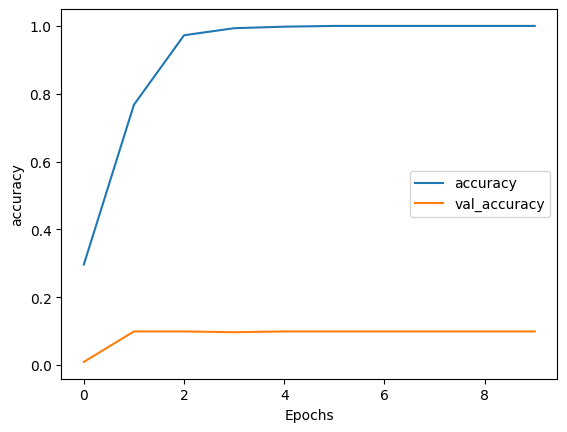

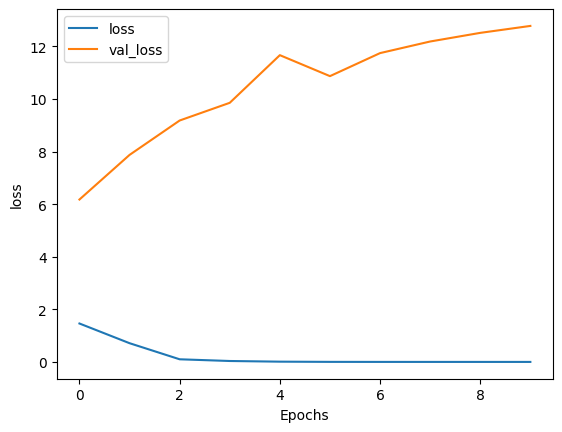

In [106]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Get Predictions!

In [107]:
results = model.predict(validation_padded)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


In [108]:
print(validation_articles[0])
print(validation_labels[0])

Costin aims for comeback in 2006

Jamie Costin should be paralysed.

He says so himself in a matter-of-fact way as he recalls the car accident which occurred nine days before he was scheduled to step out into the Olympic Stadium in Athens for the 50K Walk. There is an ironic chuckle as he talks of his immediate thoughts after a lorry, driving on the wrong side of the road, had ploughed into his rental car. "I was in a lot of pain and I guessed that one of my toes was broken," says the Waterford man. "But I was thinking maybe with a cortisone injection you never know. "In my back, it felt as though all the muscles had been ripped off my pelvis but I was thinking maybe we could do something with laser therapy and ultra sound and hopefully I'd be able to race." It took over 10 hours before Jamie knew with certainty that he would not be competing in his second Olympics. "My back had been broken in two places and with one of my vertebrae, the bottom part had exploded so I'm fierce lucky not

In [109]:
print(results[0])

[4.5706579e-06 9.9652058e-01 7.6334865e-05 2.9084738e-03 5.8449682e-06
 4.8432374e-04]


In [110]:
abels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(labels[np.argmax(results[0]) - 1])

business


In [111]:
#Modularising the predict function
def predict_category(val_index):
    labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
    model.predict(validation_padded[val_index])
    print('Article:', validation_articles[val_index])
    print('===========================================')
    print('Label:', validation_labels[val_index])
    print('===========================================')
    print('Predicted Label:',labels[np.argmax(results[val_index]) - 1])


In [114]:
#Modularising the predict function
def predict_category(val_index):
    labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
    # The following line is modified to pass a batch of size 1
    pred = model.predict(validation_padded[val_index:val_index+1])
    print('Article:', validation_articles[val_index])
    print('===========================================')
    print('Label:', validation_labels[val_index])
    print('===========================================')
    print('Predicted Label:',labels[np.argmax(pred) - 1])

In [115]:
predict_category(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Article: Costin aims for comeback in 2006

Jamie Costin should be paralysed.

He says so himself in a matter-of-fact way as he recalls the car accident which occurred nine days before he was scheduled to step out into the Olympic Stadium in Athens for the 50K Walk. There is an ironic chuckle as he talks of his immediate thoughts after a lorry, driving on the wrong side of the road, had ploughed into his rental car. "I was in a lot of pain and I guessed that one of my toes was broken," says the Waterford man. "But I was thinking maybe with a cortisone injection you never know. "In my back, it felt as though all the muscles had been ripped off my pelvis but I was thinking maybe we could do something with laser therapy and ultra sound and hopefully I'd be able to race." It took over 10 hours before Jamie knew with certainty that he would not be competing in his second Olympics. "My back had been broken in two places and with one of my vertebrae, the b

In [116]:
def random_pred(random_article):
    txt = [random_article]
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=max_length)
    pred = model.predict(padded)
    labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
    print(labels[np.argmax(pred) - 1])

In [117]:
random_art = 'cars pull down us retail figures us retail sales fell 0.3% in january  the biggest monthly decline since last august  driven down by a heavy fall in car sales.  the 3.3% fall in car sales had been expected  coming after december s 4% rise in car sales  fuelled by generous pre-christmas special offers. excluding the car sector  us retail sales were up 0.6% in january  twice what some analysts had been expecting. us retail spending is expected to rise in 2005  but not as quickly as in 2004.  steve gallagher  us chief economist at sg corporate & investment banking  said january s figures were  decent numbers .   we are not seeing the numbers that we saw in the second half of 2004  but they are still pretty healthy   he added. sales at appliance and electronic stores were down 0.6% in january  while sales at hardware stores dropped by 0.3% and furniture store sales dipped 0.1%. sales at clothing and clothing accessory stores jumped 1.8%  while sales at general merchandise stores  a category that includes department stores  rose by 0.9%. these strong gains were in part put down to consumers spending gift vouchers they had been given for christmas.  sales at restaurants  bars and coffee houses rose by 0.3%  while grocery store sales were up 0.5%. in december  overall retail sales rose by 1.1%. excluding the car sector  sales rose by just 0.3%. parul jain  deputy chief economist at nomura securities international  said consumer spending would continue to rise in 2005  only at a slower rate of growth than in 2004.  consumers continue to retain their strength in the first quarter   he said. van rourke  a bond strategist at popular securities  agreed that the latest retail sales figures were  slightly stronger than expected .'
random_pred(random_art)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
bussiness


In [119]:
random_art1="Sports News Today: Get exclusive and latest Sports News Headlines, Live Score Updates, Live Cricket Scores, Football, Results and more with ProPakistani."
random_pred(random_art1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
sport


In [125]:
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Load the model
model = joblib.load('model.pkl')  # Make sure 'model.pkl' is in the same directory as your script

# 2. Preprocess your input text
def random_pred(random_article):
    # Assuming you have the tokenizer loaded/defined
    txt = [random_article]
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=200)  # Assuming max_length was 200 during training
    pred = model.predict(padded)
    labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
    print(labels[np.argmax(pred) - 1])


# 3. Make predictions
random_art1 = "Sports News Today: Get exclusive and latest Sports News Headlines, Live Score Updates, Live Cricket Scores, Football, Results and more with ProPakistani."
random_pred(random_art1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
sport


In [1]:
model.save("news_classifier", save_format="tf")

NameError: name 'model' is not defined